In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('dataset/online_retail_II.xlsx')
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [3]:
#summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


# EDA

### **1)** ***Remove*** rows where ***Customer ID is null***.

In [6]:
#Check for null values

df.isnull().sum()

#OK, so we can remove rows where customer ID is null, bcoz those rows are useless for our analysis.

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
#Descriptive statistics

df.describe()

#I see, Quantity have -ve values.
# Price has -ve values.

#Let's check that out

Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

In [8]:
df[df['Quantity']<0].head()

#I see, for all such rows where quantity is negative, Invoice starts with 'C'. Meaning, these are cancelled/returned orders which we don't need for the analysis.

Invoice StockCode                    Description  Quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            InvoiceDate  Price  Customer ID    Country  
178 2009-12-01 10:33:00   2.95      16321.0  Australia  
179 2009-12-01 10:33:00   1.65      16321.0  Australia  
180 2009-12-01 10:33:00   4.25      16321.0  Australia  
181 2009-12-01 10:33:00   2.10      16321.0  Australia  
182 2009-12-01 10:33:00   2.95      16321.0  Australia

In [9]:
df[df['Price']<0].head()

#so we see for these rows, Invoice starts with letter 'A'

Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price  Customer ID         Country  
179403 -53594.36          NaN  United Kingdom  
276274 -44031.79          NaN  United Kingdom  
403472 -38925.87          NaN  United Kingdom

### **2)** ***Remove*** rows where ***Quantity and price values are negative***, they represent Cancelled Orders and Bad Debt adjustments.

In [11]:
#Invoice seems typically a six numbered digit, where we also saw invoices starting with 'C' and 'A'.
# Let's see all kinds of invoices

#Before we do pattern matching, we'll convert invoice column to string
df['Invoice']=df['Invoice'].astype('str')
df[df['Invoice'].str.match(r'^\d{6}$')==False]['Invoice'].str.replace('[0-9]','', regex=True).unique()

array(['C', 'A'], dtype=object)

In [12]:
#Let's check the invoice rows that starts with 'A'

df[df['Invoice'].str.match(r'^A')]

#It seems these rows are for Adjustment entries, we should exclude this.

Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price  Customer ID         Country  
179403 -53594.36          NaN  United Kingdom  
276274 -44031.79          NaN  United Kingdom  
403472 -38925.87          NaN  United Kingdom

In [13]:
#Let's explore values from Stockcode column
#StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [14]:
#Let's see what kond of alphabets/pattern do we have for stockcode

df['StockCode']=df['StockCode'].astype('str')
df['StockCode'].str.replace('[0-9]','',regex=True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [15]:
df[df['StockCode'].str.match(r'^[a-zA-Z]')]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', 'C3', 'SP1002', 'AMAZONFEE'], dtype=object)

In [16]:
#Let's go through each stockcode basically and check if they're valid.
#Our focus for this analysis on product data which customer has bought.

df[df['StockCode'].str.match(r'^AMAZONFEE')].head()

#So from above codes, 'PADS', 'SP1002' are legit stockcodes belonging to products that customer bought and and should be included.

Invoice  StockCode Description  Quantity         InvoiceDate  \
440688  C531400  AMAZONFEE  AMAZON FEE        -1 2010-11-08 10:08:00   
440698   531411  AMAZONFEE  AMAZON FEE         1 2010-11-08 10:11:00   
517452  C537600  AMAZONFEE  AMAZON FEE        -1 2010-12-07 12:41:00   
517953  C537630  AMAZONFEE  AMAZON FEE        -1 2010-12-07 15:04:00   
517955   537632  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:08:00   

           Price  Customer ID         Country  
440688   6706.71          NaN  United Kingdom  
440698   6706.71          NaN  United Kingdom  
517452      1.00          NaN  United Kingdom  
517953  13541.33          NaN  United Kingdom  
517955  13541.33          NaN  United Kingdom

### **3)** ***Include*** only those rows where ***StockCode is either strictly 5 digit number/ 5 digit number followed by alphabet/ stockcodes is 'PADS' and 'SP1002'***.

# Data Cleaning

In [19]:
#Take copy of original df

cleaned_df=df.copy()

In [20]:
#firstly Let's remove rows where customer id is null

cleaned_df=cleaned_df[~cleaned_df['Customer ID'].isnull()].reset_index(drop=True)

In [21]:
#Removing rows where quantity and price is -ve.

cleaned_df=cleaned_df[~((cleaned_df['Quantity']<0) | (cleaned_df['Price']<0))].reset_index(drop=True)

In [22]:
#Including only valid stockcodes

cleaned_df=cleaned_df[
  cleaned_df['StockCode'].str.match(r'^\d{5}$')
| cleaned_df['StockCode'].str.match(r'^\d{5}[a-zA-Z]+$')
| cleaned_df['StockCode'].str.match(r'^PADS')
| cleaned_df['StockCode'].str.match(r'^SP1002')
].reset_index(drop=True)

In [23]:
cleaned_df.describe()

Quantity                    InvoiceDate          Price  \
count  406339.000000                         406339  406339.000000   
mean       13.619045  2010-07-01 10:11:48.247300608       2.991461   
min         1.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 14:01:00       1.250000   
50%         5.000000            2010-07-09 15:48:00       1.950000   
75%        12.000000            2010-10-14 17:09:00       3.750000   
max     19152.000000            2010-12-09 20:01:00     295.000000   
std        97.000424                            NaN       4.285865   

         Customer ID  
count  406339.000000  
mean    15373.632602  
min     12346.000000  
25%     14004.000000  
50%     15326.000000  
75%     16814.000000  
max     18287.000000  
std      1677.371303

In [24]:
#Let's check how much % of data got removed from the original df

round(100-(len(cleaned_df)/len(df))*100,2)

22.67

# Feature Engineering

In [26]:
#Let's add sales revenue column

cleaned_df['SalesRevenue']=cleaned_df['Quantity']*cleaned_df['Price']

## RFM Analysis

In [28]:
cleaned_df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  SalesRevenue  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0

In [29]:
#Let's aggregate data to create Monetary, frequency, and recency column

aggregated_df=cleaned_df.groupby(['Customer ID'], as_index=False).agg(
    MonetaryValue=('SalesRevenue','sum'),
    Frequency=('Invoice','nunique'),
    LastInvoiceDate=('InvoiceDate','max')
)

aggregated_df.head()

Customer ID  MonetaryValue  Frequency     LastInvoiceDate
0      12346.0         169.36          2 2010-06-28 13:53:00
1      12347.0        1323.32          2 2010-12-07 14:57:00
2      12348.0         221.16          1 2010-09-27 14:59:00
3      12349.0        2221.14          2 2010-10-28 08:23:00
4      12351.0         300.93          1 2010-11-29 15:23:00

In [30]:
max_LastInvoiceDate = aggregated_df['LastInvoiceDate'].max()
max_LastInvoiceDate

Timestamp('2010-12-09 20:01:00')

In [31]:
aggregated_df['Recency']=(max_LastInvoiceDate-aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

Customer ID  MonetaryValue  Frequency     LastInvoiceDate  Recency
0      12346.0         169.36          2 2010-06-28 13:53:00      164
1      12347.0        1323.32          2 2010-12-07 14:57:00        2
2      12348.0         221.16          1 2010-09-27 14:59:00       73
3      12349.0        2221.14          2 2010-10-28 08:23:00       42
4      12351.0         300.93          1 2010-11-29 15:23:00       10

In [32]:
aggregated_df.describe()

Customer ID  MonetaryValue    Frequency  \
count   4285.000000    4285.000000  4285.000000   
mean   15356.806768    2024.130244     4.426138   
min    12346.000000       1.550000     1.000000   
25%    13891.000000     307.560000     1.000000   
50%    15362.000000     702.900000     2.000000   
75%    16840.000000    1704.290000     5.000000   
max    18287.000000  349164.350000   183.000000   
std     1699.839258    8813.955639     7.938017   

                     LastInvoiceDate      Recency  
count                           4285  4285.000000  
mean   2010-09-11 00:06:10.431738624    89.548191  
min              2009-12-01 10:49:00     0.000000  
25%              2010-07-27 14:39:00    17.000000  
50%              2010-10-19 12:10:00    51.000000  
75%              2010-11-22 11:24:00   135.000000  
max              2010-12-09 20:01:00   373.000000  
std                              NaN    96.359872

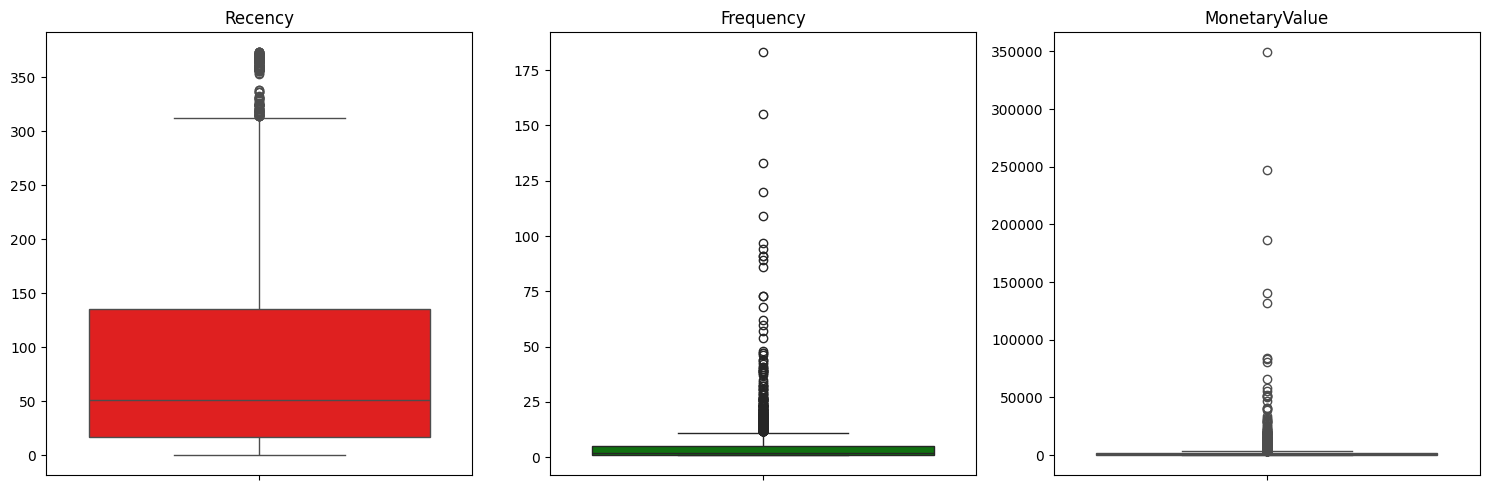

In [33]:
#Now, checking for outliers in the aggregated_df

fig, ax=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(y='Recency',data=aggregated_df, ax=ax[0],color='r')
ax[0].set_title('Recency')
ax[0].set_ylabel('')

sns.boxplot(y='Frequency',data=aggregated_df, ax=ax[1],color='g')
ax[1].set_title('Frequency')
ax[1].set_ylabel('')

sns.boxplot(y='MonetaryValue',data=aggregated_df, ax=ax[2],color='b')
ax[2].set_title('MonetaryValue')
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [34]:
#As we can see from above boxplot, there are extreme outliers for monetary and Frequency which has to be seperated for seperate analysis
# and we'll use non-outliers data for performing clustering

M_Q1=aggregated_df['MonetaryValue'].quantile(.25)
M_Q3=aggregated_df['MonetaryValue'].quantile(.75)
M_IQR=M_Q3-M_Q1

monetary_outliers_df= aggregated_df[(aggregated_df['MonetaryValue']<(M_Q1-(1.5*M_IQR))) | (aggregated_df['MonetaryValue']>(M_Q3+(1.5*M_IQR)))].copy()
monetary_outliers_df.describe()

Customer ID  MonetaryValue   Frequency                LastInvoiceDate  \
count    423.000000     423.000000  423.000000                            423   
mean   15103.040189   12188.136610   17.167849  2010-11-09 12:26:02.978723328   
min    12357.000000    3802.040000    1.000000            2009-12-10 18:03:00   
25%    13622.000000    4605.940000    8.000000            2010-11-08 13:17:30   
50%    14961.000000    6191.320000   12.000000            2010-11-26 12:19:00   
75%    16692.000000   10273.235000   18.000000            2010-12-06 10:34:30   
max    18260.000000  349164.350000  183.000000            2010-12-09 19:32:00   
std     1728.661406   25830.872283   19.729755                            NaN   

          Recency  
count  423.000000  
mean    30.035461  
min      0.000000  
25%      3.000000  
50%     13.000000  
75%     31.000000  
max    364.000000  
std     51.541004

In [35]:
F_Q1=aggregated_df['Frequency'].quantile(.25)
F_Q3=aggregated_df['Frequency'].quantile(.75)
F_IQR=F_Q3-F_Q1

frequency_outliers_df= aggregated_df[(aggregated_df['Frequency']<(F_Q1-(1.5*F_IQR))) | (aggregated_df['Frequency']>(F_Q3+(1.5*F_IQR)))].copy()
frequency_outliers_df.describe()

Customer ID  MonetaryValue   Frequency                LastInvoiceDate  \
count    279.000000     279.000000  279.000000                            279   
mean   15352.655914   14409.767799   23.810036  2010-11-23 11:06:20.645161216   
min    12437.000000    1094.390000   12.000000            2010-05-12 16:51:00   
25%    13800.000000    4331.560500   13.000000            2010-11-20 13:14:30   
50%    15465.000000    6615.770000   17.000000            2010-12-02 10:46:00   
75%    16828.500000   11692.405000   23.000000            2010-12-07 11:08:30   
max    18260.000000  349164.350000  183.000000            2010-12-09 19:32:00   
std     1748.429987   31381.759565   21.932937                            NaN   

          Recency  
count  279.000000  
mean    16.089606  
min      0.000000  
25%      2.000000  
50%      7.000000  
75%     19.000000  
max    211.000000  
std     26.589117

In [36]:
#Now filtering outliers data from the aggregated_df

non_outliers_df=aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))].copy()
non_outliers_df=non_outliers_df.reset_index(drop=True)
non_outliers_df.describe()

Customer ID  MonetaryValue    Frequency  \
count   3809.000000    3809.000000  3809.000000   
mean   15376.482804     885.502197     2.863481   
min    12346.000000       1.550000     1.000000   
25%    13912.000000     279.910000     1.000000   
50%    15389.000000     588.050000     2.000000   
75%    16854.000000    1269.050000     4.000000   
max    18287.000000    3788.210000    11.000000   
std     1693.199806     817.672283     2.243748   

                     LastInvoiceDate      Recency  
count                           3809  3809.000000  
mean   2010-09-03 11:16:46.516146176    97.082174  
min              2009-12-01 10:49:00     0.000000  
25%              2010-07-08 14:48:00    22.000000  
50%              2010-10-12 16:25:00    58.000000  
75%              2010-11-17 13:14:00   154.000000  
max              2010-12-09 20:01:00   373.000000  
std                              NaN    98.111495

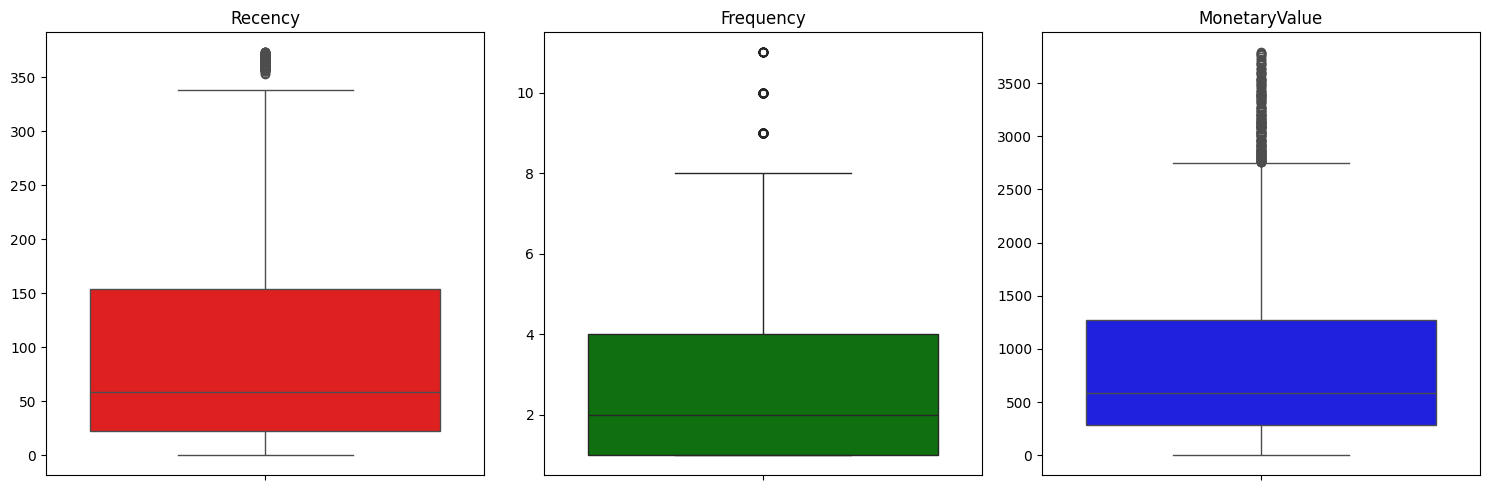

In [37]:

fig, ax=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(y='Recency',data=non_outliers_df, ax=ax[0],color='r')
ax[0].set_title('Recency')
ax[0].set_ylabel('')

sns.boxplot(y='Frequency',data=non_outliers_df, ax=ax[1],color='g')
ax[1].set_title('Frequency')
ax[1].set_ylabel('')

sns.boxplot(y='MonetaryValue',data=non_outliers_df, ax=ax[2],color='b')
ax[2].set_title('MonetaryValue')
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()

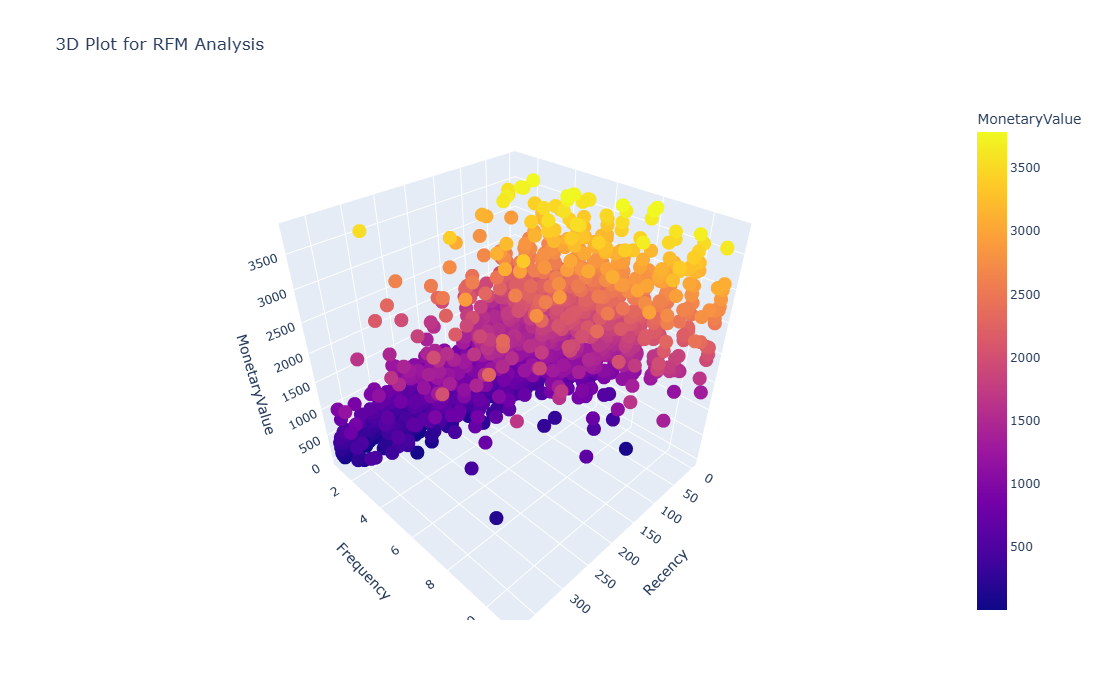

In [38]:
#let's create a 3d plot across R,F,M values to see what our data looks like

import plotly.express as px

# Create 3D scatter plot using Plotly
fig = px.scatter_3d(non_outliers_df, 
                    x='Recency', y='Frequency', z='MonetaryValue',
                   color='MonetaryValue',
                    hover_data='Customer ID',
                    title='3D Plot for RFM Analysis',
                   width=1100,
                   height=700)

# Show the plot
fig.show()

In [39]:
# we can notice from the 3d plot, all our features are in diffent scales. 
# To apply clustering algorithm, it is necessary that we keep all our data in the same scale.
# let's perform standard scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
scaled_data=scaler.fit_transform(non_outliers_df[['Recency','Frequency', 'MonetaryValue']])

In [41]:
scaled_data_df=pd.DataFrame(scaled_data,columns=('Recency','Frequency', 'MonetaryValue'),index=non_outliers_df.index)
scaled_data_df.head()

Recency  Frequency  MonetaryValue
0  0.682149  -0.384889      -0.875945
1 -0.969251  -0.384889       0.535514
2 -0.245489  -0.830631      -0.812586
3 -0.561498  -0.384889       1.633678
4 -0.887700  -0.830631      -0.715016

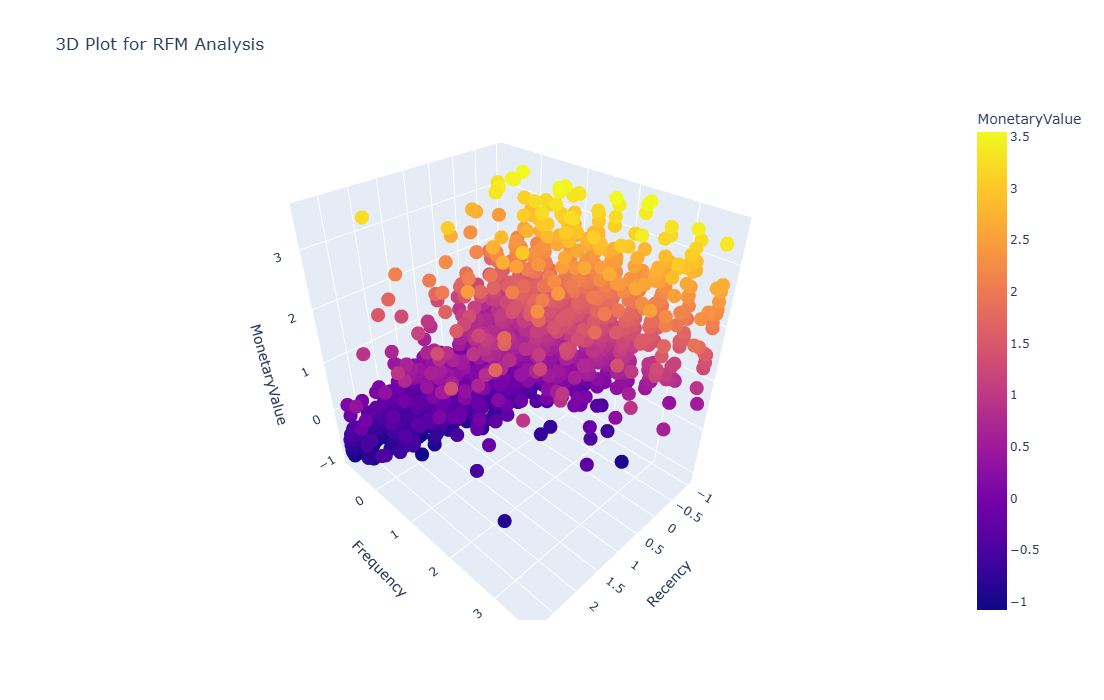

In [42]:
#let's create a 3d plot across R,F,M values to see what our data looks like

import plotly.express as px

# Create 3D scatter plot using Plotly
fig = px.scatter_3d(scaled_data_df, 
                    x='Recency', y='Frequency', z='MonetaryValue',
                   color='MonetaryValue',
                    title='3D Plot for RFM Analysis',
                   width=1100,
                   height=700)

# Show the plot
fig.show()

# K-means Clustering

In [44]:
#import kmeans library

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
max_k = 12

inertia=[]
silhoutte_scores=[]

k_values=range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    cluster_labels=kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)
    sil_score=silhouette_score(scaled_data_df, cluster_labels)
    silhoutte_scores.append(sil_score)

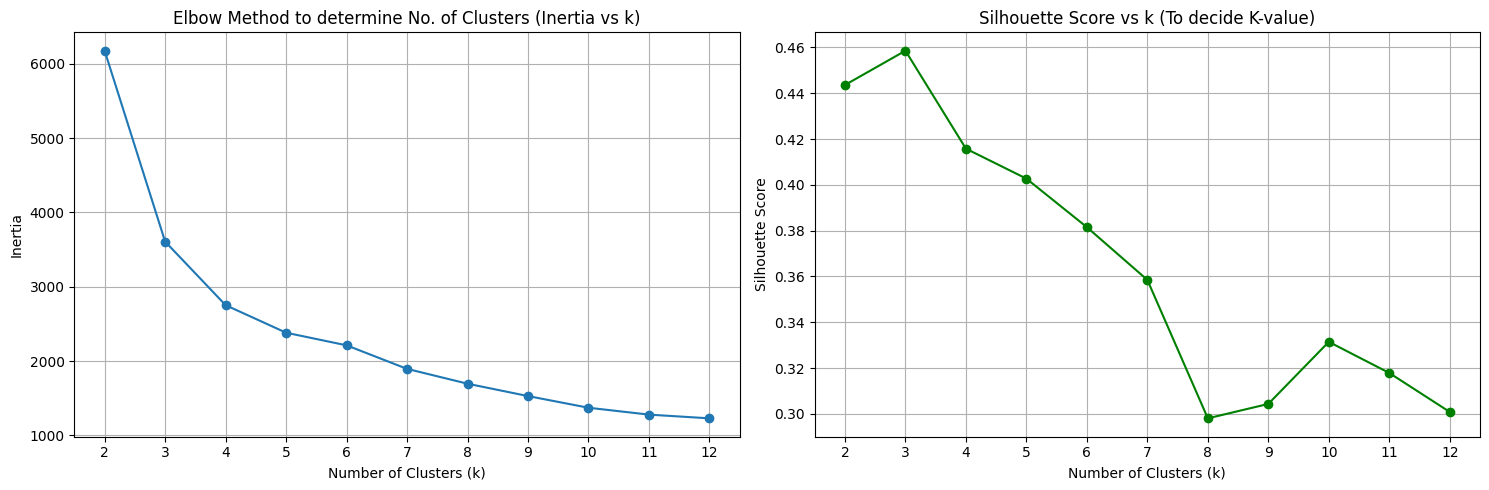

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Elbow Method to determine No. of Clusters (Inertia vs k)')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].set_xticks(k_values)
ax[0].grid(True)

# Plot Silhouette Score
ax[1].plot(k_values, silhoutte_scores, marker='o', color='green')
ax[1].set_title('Silhouette Score vs k (To decide K-value)')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_xticks(k_values)
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [47]:
#from 1st plot, we can see Elbow forms at K=4 and K=5.
#To confirm K, looking at 2nd plot, K=4 has higher silhouette score than K=5. 
#Hence we'll go with K=4.

#Silhoutte score measures cohesion and seperation of data points in a cluster.
#Cohesion means how close a data point is present to other data point in the same cluster.
#Seperation means how far a data point is placed to data point from neighbouring cluster.

In [48]:
kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000) #Create the Model, assign how many clusters you want
cluster_labels=kmeans.fit_predict(scaled_data_df) #Train the model and assign cluster labels
cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [49]:
#Append clusterlabels to non_outliers_df

non_outliers_df['Cluster']=cluster_labels

In [50]:
non_outliers_df.head()

Customer ID  MonetaryValue  Frequency     LastInvoiceDate  Recency  Cluster
0      12346.0         169.36          2 2010-06-28 13:53:00      164        1
1      12347.0        1323.32          2 2010-12-07 14:57:00        2        0
2      12348.0         221.16          1 2010-09-27 14:59:00       73        2
3      12349.0        2221.14          2 2010-10-28 08:23:00       42        0
4      12351.0         300.93          1 2010-11-29 15:23:00       10        2

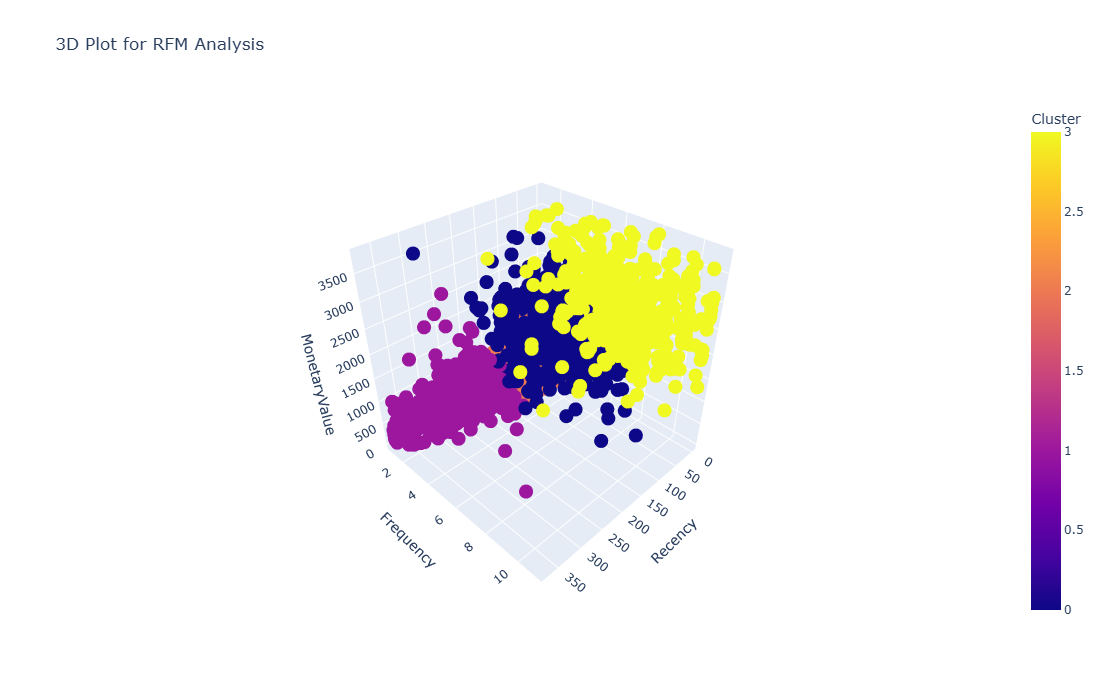

In [51]:
# Create 3D scatter plot using Plotly
fig = px.scatter_3d(non_outliers_df, 
                    x='Recency', y='Frequency', z='MonetaryValue',
                   color='Cluster',
                    hover_data='Customer ID',
                    title='3D Plot for RFM Analysis',
                   width=1100,
                   height=700)
fig.update_layout(
    scene_camera=dict(
        eye=dict(x=1.5, y=1.5, z=1.5)  # Change these values to rotate the view
    )
)

# Show the plot
fig.show()

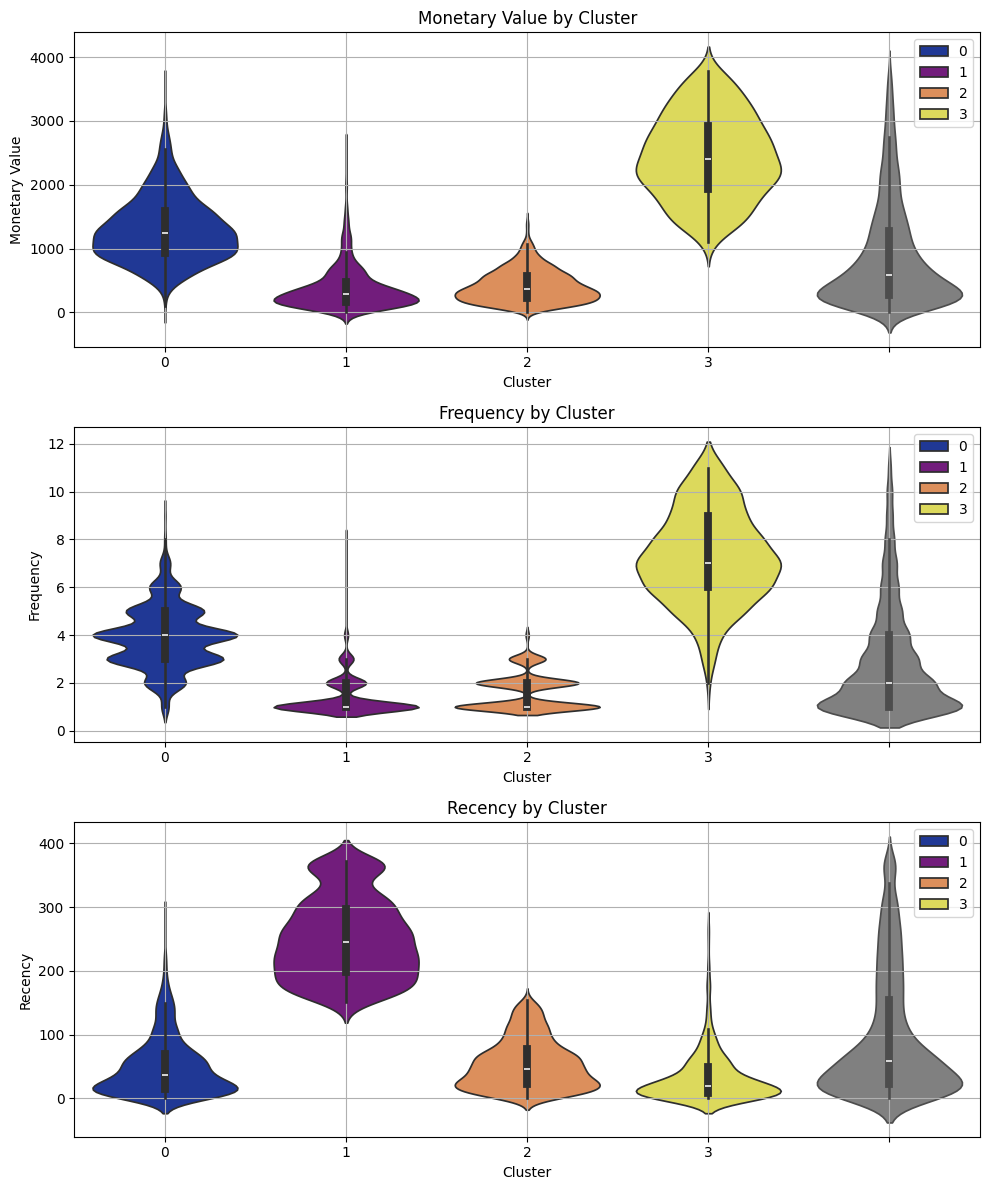

In [147]:
cluster_colors={0:'#0d2ca8',1:'#7f0d8c',2:'#f28b46',3:'#f2ed46'}

fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Monetary Value
sns.violinplot(x='Cluster', y='MonetaryValue', data=non_outliers_df, hue='Cluster',palette=cluster_colors, ax=ax[0])
sns.violinplot(y='MonetaryValue', data=non_outliers_df, color='gray', ax=ax[0])
ax[0].set_title('Monetary Value by Cluster')
ax[0].set_ylabel('Monetary Value')
ax[0].grid(True)

# Plot 2: Frequency
sns.violinplot(x='Cluster', y='Frequency', data=non_outliers_df, hue='Cluster',palette=cluster_colors, ax=ax[1])
sns.violinplot(y='Frequency', data=non_outliers_df, color='gray', ax=ax[1])
ax[1].set_title('Frequency by Cluster')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

# Plot 3: Recency
sns.violinplot(x='Cluster', y='Recency', data=non_outliers_df, hue='Cluster',palette=cluster_colors, ax=ax[2])
sns.violinplot(y='Recency', data=non_outliers_df, color='gray', ax=ax[2])
ax[2].set_title('Recency by Cluster')
ax[2].set_ylabel('Recency')
ax[2].grid(True)

plt.tight_layout()
plt.show()

### Clusters and Their Descriptions

1. **Cluster 0 (Blue): "Re-Engage"**
   - **Rationale**: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
   - **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.


2. **Cluster 1 (Violet): "Retain"**
   - **Rationale**: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
   - **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

3. **Cluster 2 (Orange): "Nurture"**
   - **Rationale**: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
   - **Action**: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. **Cluster 3 (Yellow): "Reward"**
   - **Rationale**: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
   - **Action**: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

---

### Summary of Cluster Names:
- **Cluster 0 (Blue)**: "Re-Engage"
- **Cluster 1 (Violet)**: "Retain"
- **Cluster 2 (Orange)**: "Nurture"
- **Cluster 3 (Yellow)**: "Reward"


# Outlier Analysis

In [168]:
overlapping_indices=monetary_outliers_df.index.intersection(frequency_outliers_df.index)

In [184]:
monetary_only_outliers=monetary_outliers_df.drop(overlapping_indices)
frequency_only_outliers=frequency_outliers_df.drop(overlapping_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlapping_indices]

In [190]:
monetary_only_outliers['Cluster']=-1
frequency_only_outliers['Cluster']=-2
monetary_and_frequency_outliers['Cluster']=-3

outlier_clusters_df=pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])
outlier_clusters_df.head()

Customer ID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
9       12357.0       11229.99          1 2010-11-16 10:05:00       23   
25      12380.0        4782.84          4 2010-08-31 14:54:00      100   
42      12409.0       12346.62          4 2010-10-15 10:24:00       55   
48      12415.0       19468.84          4 2010-11-29 15:07:00       10   
61      12431.0        4145.52         11 2010-12-01 10:03:00        8   

    Cluster  
9        -1  
25       -1  
42       -1  
48       -1  
61       -1

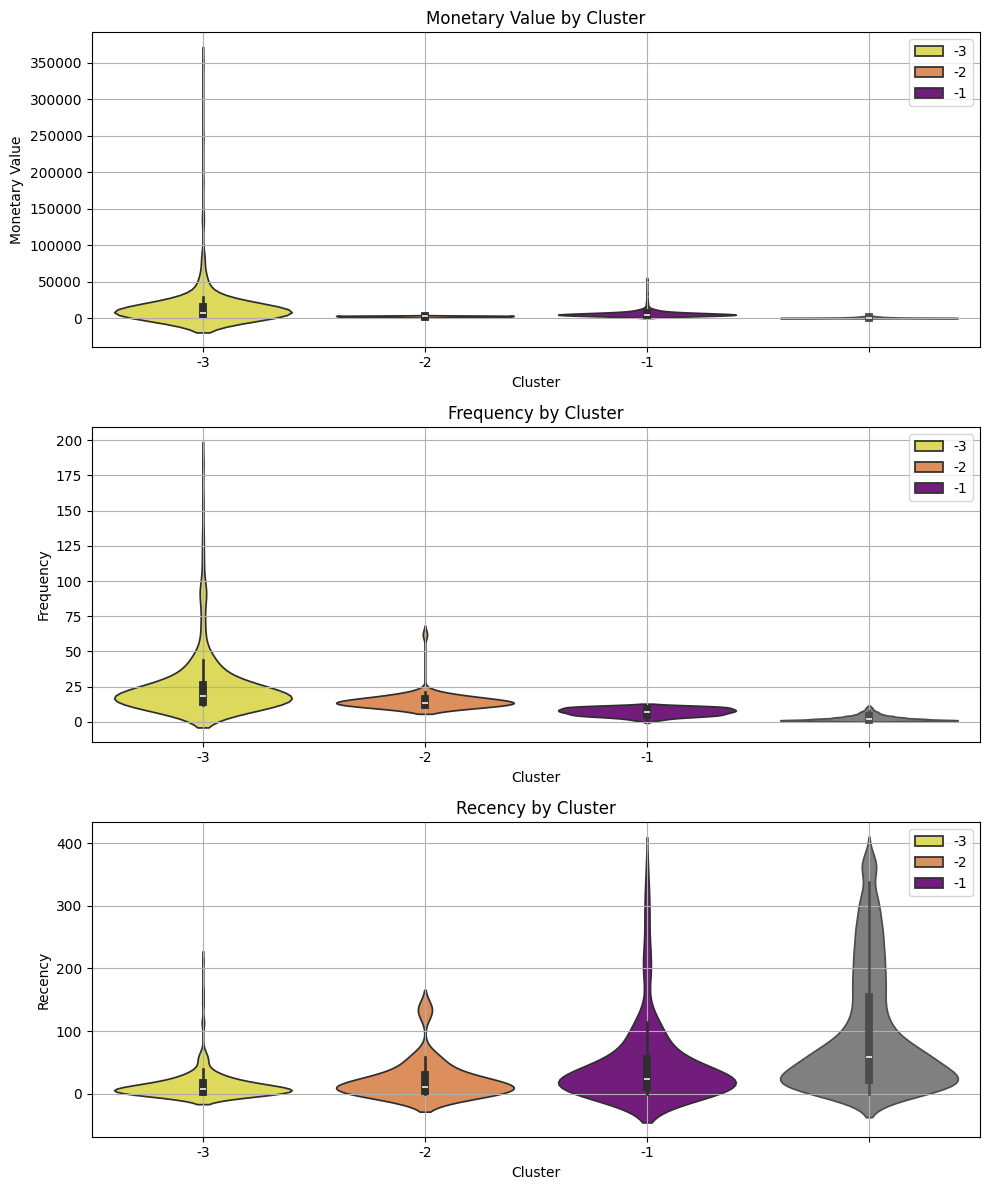

In [194]:
cluster_colors_outlier_analysis={-1:'#7f0d8c',-2:'#f28b46',-3:'#f2ed46'}


fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Monetary Value
sns.violinplot(x='Cluster', y='MonetaryValue', data=outlier_clusters_df, hue='Cluster',palette=cluster_colors_outlier_analysis, ax=ax[0])
sns.violinplot(y='MonetaryValue', data=non_outliers_df, color='gray', ax=ax[0])
ax[0].set_title('Monetary Value by Cluster')
ax[0].set_ylabel('Monetary Value')
ax[0].grid(True)

# Plot 2: Frequency
sns.violinplot(x='Cluster', y='Frequency', data=outlier_clusters_df, hue='Cluster',palette=cluster_colors_outlier_analysis, ax=ax[1])
sns.violinplot(y='Frequency', data=non_outliers_df, color='gray', ax=ax[1])
ax[1].set_title('Frequency by Cluster')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

# Plot 3: Recency
sns.violinplot(x='Cluster', y='Recency', data=outlier_clusters_df, hue='Cluster',palette=cluster_colors_outlier_analysis, ax=ax[2])
sns.violinplot(y='Recency', data=non_outliers_df, color='gray', ax=ax[2])
ax[2].set_title('Recency by Cluster')
ax[2].set_ylabel('Recency')
ax[2].grid(True)

plt.tight_layout()
plt.show()

## Cluster Descriptions for Outliers

### Cluster -1 (Monetary Outliers): **PAMPER**
**Characteristics**: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.  
**Potential Strategy**: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

---

### Cluster -2 (Frequency Outliers): **UPSELL**
**Characteristics**: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.  
**Potential Strategy**: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

---

### Cluster -3 (Monetary & Frequency Outliers): **DELIGHT**
**Characteristics**: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.  
**Potential Strategy**: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


In [201]:
full_clustering_df=pd.concat([non_outliers_df,outlier_clusters_df])
full_clustering_df.head(10)

Customer ID  MonetaryValue  Frequency     LastInvoiceDate  Recency  Cluster
0      12346.0         169.36          2 2010-06-28 13:53:00      164        1
1      12347.0        1323.32          2 2010-12-07 14:57:00        2        0
2      12348.0         221.16          1 2010-09-27 14:59:00       73        2
3      12349.0        2221.14          2 2010-10-28 08:23:00       42        0
4      12351.0         300.93          1 2010-11-29 15:23:00       10        2
5      12352.0         343.80          2 2010-11-29 10:07:00       10        2
6      12353.0         317.76          1 2010-10-27 12:44:00       43        2
7      12355.0         488.21          1 2010-05-21 11:59:00      202        1
8      12356.0        3126.25          3 2010-11-24 12:24:00       15        3
9      12358.0        2519.01          3 2010-11-29 10:56:00       10        0

In [203]:
cluster_labels = {
    0: "RE-ENGAGE",
    1: "RETAIN",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [207]:
full_clustering_df['ClusterLabel']=full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df.head(10)

Customer ID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
0      12346.0         169.36          2 2010-06-28 13:53:00      164   
1      12347.0        1323.32          2 2010-12-07 14:57:00        2   
2      12348.0         221.16          1 2010-09-27 14:59:00       73   
3      12349.0        2221.14          2 2010-10-28 08:23:00       42   
4      12351.0         300.93          1 2010-11-29 15:23:00       10   
5      12352.0         343.80          2 2010-11-29 10:07:00       10   
6      12353.0         317.76          1 2010-10-27 12:44:00       43   
7      12355.0         488.21          1 2010-05-21 11:59:00      202   
8      12356.0        3126.25          3 2010-11-24 12:24:00       15   
9      12358.0        2519.01          3 2010-11-29 10:56:00       10   

   Cluster ClusterLabel  
0        1       RETAIN  
1        0    RE-ENGAGE  
2        2      NURTURE  
3        0    RE-ENGAGE  
4        2      NURTURE  
5        2      NURTURE  
6        2      NURTURE  
7        1       RETAIN  
8        3       REWARD  
9        0    RE-ENGAGE

# Visualization

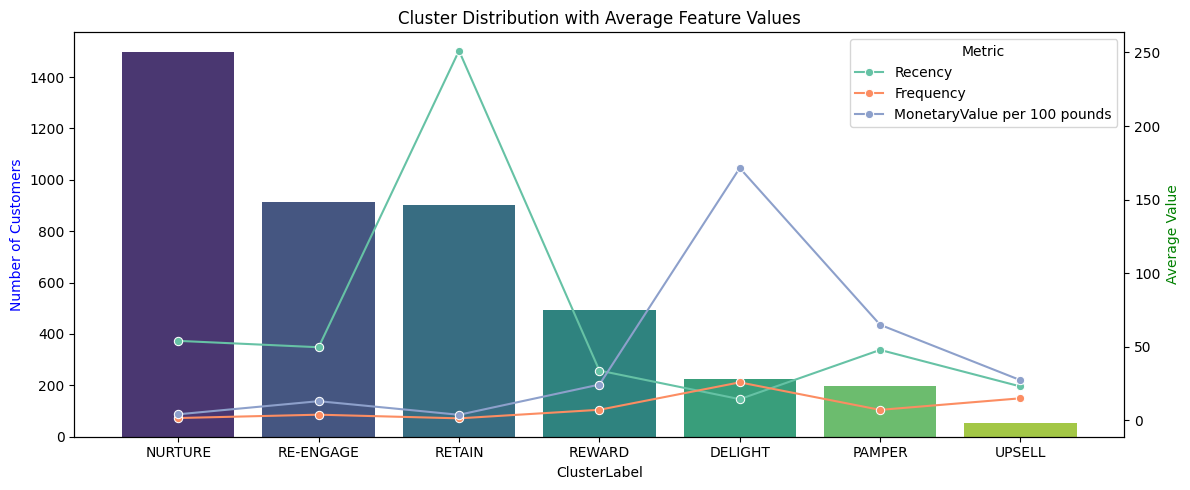

In [319]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00

feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean().reset_index()

# Ensure ClusterLabel is categorical with correct order
cluster_order = cluster_counts.index.tolist()
feature_means['ClusterLabel'] = pd.Categorical(
    feature_means['ClusterLabel'],
    categories=cluster_order,
    ordered=True
)

# Melt feature means
feature_means_long = feature_means.melt(
    id_vars='ClusterLabel',
    var_name='Metric',
    value_name='Average'
)

fig, ax1 = plt.subplots(figsize=(12, 5))

sns.barplot(x=cluster_counts.index,y=cluster_counts.values,ax=ax1,palette='viridis',hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()
sns.lineplot(data=feature_means_long,x='ClusterLabel',y='Average',hue='Metric',marker='o',palette='Set2',ax=ax2)
ax2.set_ylabel('Average Value', color='g')

plt.tight_layout()
plt.show()